In [1]:
# Data pre-processing of Einkaufsstatistik

# Importing the libraries

# Load numpy
import numpy as np

# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn library
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

# render plots in jupyter notebook
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Einkaufsstatistik.csv')

# # Printing the dataset
# dataset

# # Shape of the dataset
# dataset.shape

# # Metrics of the dataset
# dataset.describe()

# Value count of each attribute for providing some basic knowledge about the statistics, range, etc.
# dataset['KaeuferID'].value_counts()

# dataset['ProduktID'].value_counts()

# dataset['Geschlecht'].value_counts()

# dataset['Alter'].value_counts()

# dataset['Berufskategorie'].value_counts()

# dataset['Stadtkategorie'].value_counts()

# dataset['Anzahl_Jahre_in_aktueller_Stadt'].value_counts()

# dataset['Familienstand'].value_counts()

# dataset['Produkt_Kategorie_1'].value_counts()

# dataset['Produkt_Kategorie_2'].value_counts()

# dataset['Produkt_Kategorie_3'].value_counts()

# dataset['Geld_ausgegeben'].value_counts()

In [3]:
# Removing the alphabet 'P' from the ProduktID
dataset['ProduktID'] = dataset['ProduktID'].str[1:]

# Replacing all NaN values by '0'
dataset['Produkt_Kategorie_2'] = dataset['Produkt_Kategorie_2'].fillna(0)
dataset['Produkt_Kategorie_3'] = dataset['Produkt_Kategorie_3'].fillna(0)

# Mapping 'Anzahl_Jahre_in_aktueller_Stadt' category
dataset['Anzahl_Jahre_in_aktueller_Stadt'] = dataset['Anzahl_Jahre_in_aktueller_Stadt'].replace('4+', '4')

# One Hot Encoding for the 'Geschlecht' category
le = LabelEncoder() 
dataset['Geschlecht'] = le.fit_transform(dataset['Geschlecht']) 

# One Hot Encoding for the 'Alter' category
alter_dummies = pd.get_dummies(dataset['Alter'])
merged = pd.concat([dataset,alter_dummies], axis='columns')
dataset = merged.drop(['Alter', '55+'], axis='columns')

# One Hot Encoding for the 'Stadtkategorie' category
Stadtkategorie_dummies = pd.get_dummies(dataset['Stadtkategorie'])
merged = pd.concat([dataset,Stadtkategorie_dummies], axis='columns')
dataset = merged.drop([' ', 'C'], axis='columns')


In [4]:
dataset

,KaeuferID,ProduktID,Geschlecht,Berufskategorie,Anzahl_Jahre_in_aktueller_Stadt,Familienstand,Produkt_Kategorie_1,Produkt_Kategorie_2,Produkt_Kategorie_3,Geld_ausgegeben,0-17,18-25,26-35,36-45,46-50,51-55,A,B
0,1000001,00069042,0,10,2,0,3,0.0,0.0,8370,1,0,0,0,0,0,1,0
1,1000001,00248942,0,10,2,0,1,6.0,14.0,15200,1,0,0,0,0,0,1,0
2,1000001,00085442,0,10,2,0,12,14.0,0.0,1057,1,0,0,0,0,0,1,0
3,1000002,00285442,1,16,4,0,8,0.0,0.0,7969,0,0,0,0,0,0,0,0
4,1000003,00193542,1,15,3,0,1,2.0,0.0,15227,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1006033,00372445,1,13,1,1,20,0.0,0.0,368,0,0,0,0,0,1,0,1
499996,1006035,00375436,0,1,3,0,20,0.0,0.0,371,0,0,1,0,0,0,0,0
499997,1006036,00375436,0,15,4,1,20,0.0,0.0,137,0,0,1,0,0,0,0,1
499998,1006038,00375436,0,1,2,0,20,0.0,0.0,365,0,0,0,0,0,0,0,0


In [5]:
data_preprocessed_csv = dataset.to_csv (r'C:\Users\rajar\Desktop\Machine Learning for Big Data\Project\Preprocessed_data.csv')

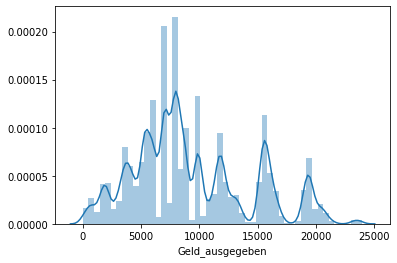

In [6]:
sns.distplot(dataset['Geld_ausgegeben'])

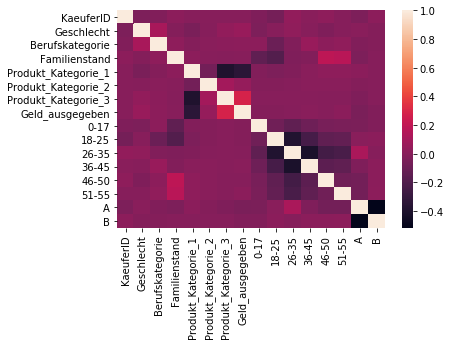

In [7]:
sns.heatmap(dataset.corr())
plt.savefig('Correlation.png')

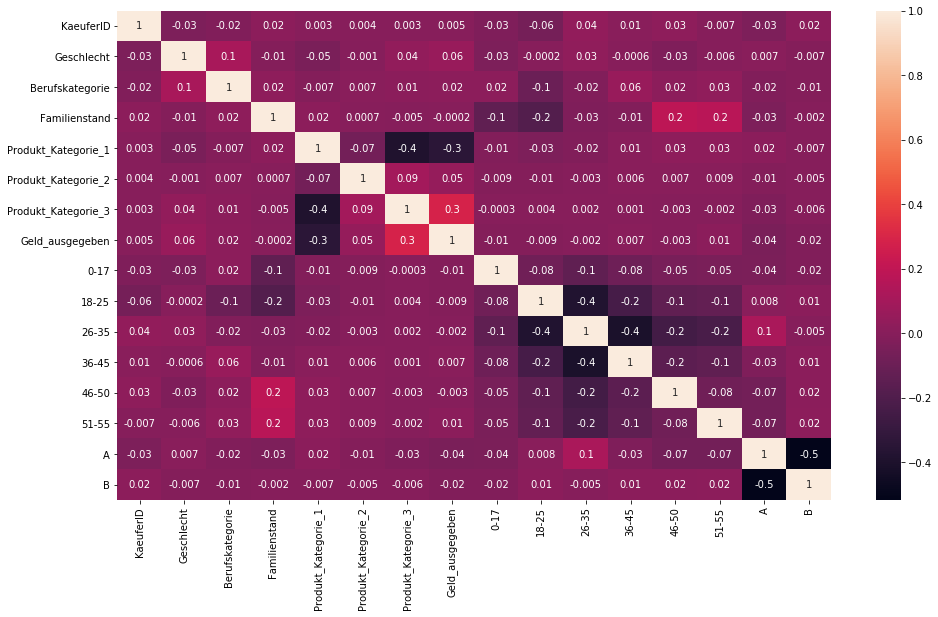

In [8]:
plt.figure(figsize=(16,9))
sns.heatmap(dataset.corr(), annot = True, fmt='.1g')
plt.savefig('Correlation_with_annotation.png')